In [2]:
# import dependencies
from path import Path
import pandas as pd
import numpy as np
import pandas as pd
from pandas import Series
import seaborn as sn
from scipy.stats import pearsonr
from scipy import stats

from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
# Import dataset & store into dataframe
merged_covid_df = pd.read_csv("Resources/merged_covid_FINAL.csv")
merged_covid_df.head()


,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766.0,584.8,41.2,2.0,0.001873,...,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766.0,584.8,41.2,0.0,0.000000,...,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766.0,584.8,41.2,2.0,0.001873,...,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766.0,584.8,41.2,0.0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766.0,584.8,41.2,0.0,0.000000,...,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0


In [4]:
new_covid_df=merged_covid_df[["continent","location", "percentage_of_Pop_Total_Cases", "percentage_of_Pop_Total_Deaths","median_age"]]
new_covid_df

,continent,location,percentage_of_Pop_Total_Cases,percentage_of_Pop_Total_Deaths,median_age
0,North America,Aruba,0.001873,0.000000,41.2
1,North America,Aruba,0.001873,0.000000,41.2
2,North America,Aruba,0.003747,0.000000,41.2
3,North America,Aruba,0.003747,0.000000,41.2
4,North America,Aruba,0.003747,0.000000,41.2
...,...,...,...,...,...
32272,Africa,Zimbabwe,0.042058,0.001204,19.6
32273,Africa,Zimbabwe,0.042334,0.001272,19.6
32274,Africa,Zimbabwe,0.042979,0.001312,19.6
32275,Africa,Zimbabwe,0.043101,0.001319,19.6


In [5]:
# Import dataset & store into dataframe
OWID_df = pd.read_csv("Resources/Raw/owid-covid-data(Aug31,2020).csv")
OWID_df.head()



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


In [6]:
new_OWID_df= OWID_df[["location","extreme_poverty" ]]
new_OWID_df.head()

,location,extreme_poverty
0,Aruba,NaN
1,Aruba,NaN
2,Aruba,NaN
3,Aruba,NaN
4,Aruba,NaN


In [7]:
merged_data_df= pd.merge(left=new_covid_df, right=new_OWID_df, left_on='location', right_on='location')
merged_data_df.head()

,continent,location,percentage_of_Pop_Total_Cases,percentage_of_Pop_Total_Deaths,median_age,extreme_poverty
0,North America,Aruba,0.001873,0.0,41.2,NaN
1,North America,Aruba,0.001873,0.0,41.2,NaN
2,North America,Aruba,0.001873,0.0,41.2,NaN
3,North America,Aruba,0.001873,0.0,41.2,NaN
4,North America,Aruba,0.001873,0.0,41.2,NaN


In [8]:
updated_poverty_df=merged_data_df.dropna()
updated_poverty_df

,continent,location,percentage_of_Pop_Total_Cases,percentage_of_Pop_Total_Deaths,median_age,extreme_poverty
114238,Europe,Albania,0.000069,0.000000,38.0,1.1
114239,Europe,Albania,0.000069,0.000000,38.0,1.1
114240,Europe,Albania,0.000069,0.000000,38.0,1.1
114241,Europe,Albania,0.000069,0.000000,38.0,1.1
114242,Europe,Albania,0.000069,0.000000,38.0,1.1
...,...,...,...,...,...,...
6624103,Africa,Zimbabwe,0.043141,0.001319,19.6,21.4
6624104,Africa,Zimbabwe,0.043141,0.001319,19.6,21.4
6624105,Africa,Zimbabwe,0.043141,0.001319,19.6,21.4
6624106,Africa,Zimbabwe,0.043141,0.001319,19.6,21.4


In [9]:
new_poverty_df=updated_poverty_df.groupby("location").mean()
new_poverty_df.head()

,percentage_of_Pop_Total_Cases,percentage_of_Pop_Total_Deaths,median_age,extreme_poverty
location,,,,
Albania,0.086480,0.002563,38.0,1.1
Algeria,0.022789,0.001155,29.1,0.5
Argentina,0.148929,0.003069,31.9,0.6
Australia,0.027269,0.000385,37.9,0.5
Austria,0.128576,0.004368,44.4,0.7


In [10]:
new_pdf=new_poverty_df.reset_index()
new_pdf

,location,percentage_of_Pop_Total_Cases,percentage_of_Pop_Total_Deaths,median_age,extreme_poverty
0,Albania,0.086480,0.002563,38.0,1.1
1,Algeria,0.022789,0.001155,29.1,0.5
2,Argentina,0.148929,0.003069,31.9,0.6
3,Australia,0.027269,0.000385,37.9,0.5
4,Austria,0.128576,0.004368,44.4,0.7
...,...,...,...,...,...
108,Uruguay,0.024105,0.000639,35.6,0.1
109,Vietnam,0.000294,0.000003,32.6,2.0
110,Yemen,0.003019,0.000829,20.3,18.8
111,Zambia,0.014117,0.000348,17.7,57.5


In [11]:
data_corrMatrix = new_pdf.corr()
data_corrMatrix

,percentage_of_Pop_Total_Cases,percentage_of_Pop_Total_Deaths,median_age,extreme_poverty
percentage_of_Pop_Total_Cases,1.000000,0.686790,0.351022,-0.350839
percentage_of_Pop_Total_Deaths,0.686790,1.000000,0.434711,-0.293893
median_age,0.351022,0.434711,1.000000,-0.693725
extreme_poverty,-0.350839,-0.293893,-0.693725,1.000000


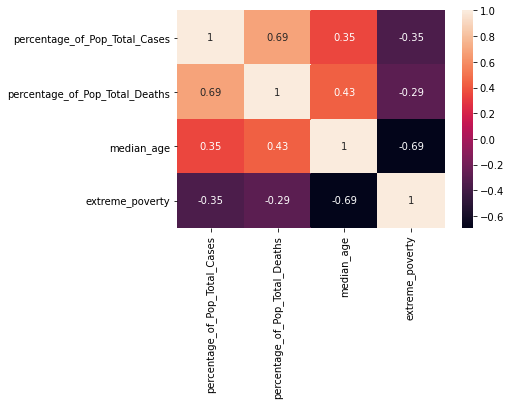

In [12]:

sn.heatmap(data_corrMatrix, annot=True)
plt.show()

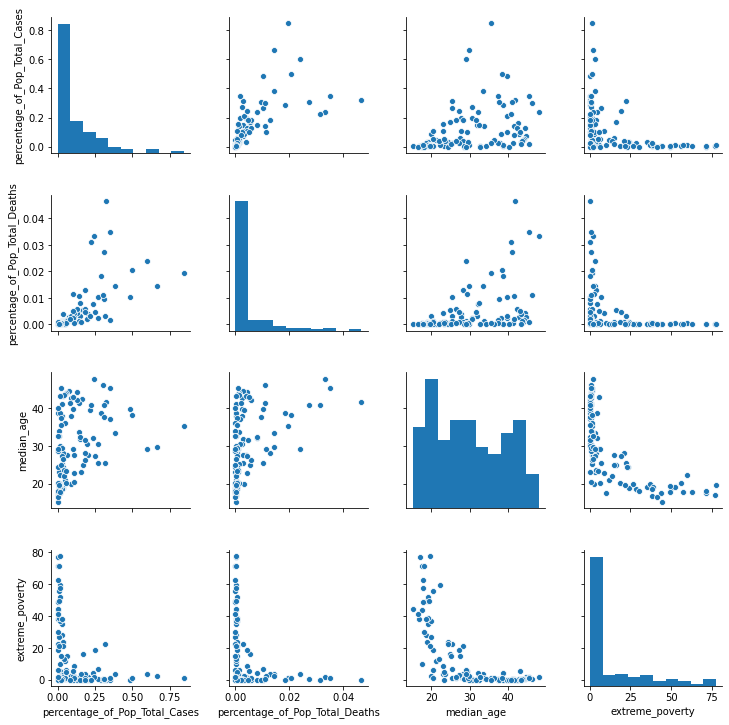

In [13]:
sn.pairplot(new_pdf)

In [14]:
continent_df=updated_poverty_df.groupby("continent").mean()
continent_df

,percentage_of_Pop_Total_Cases,percentage_of_Pop_Total_Deaths,median_age,extreme_poverty
continent,,,,
Africa,0.037722,0.000668,21.876305,30.393001
Asia,0.053870,0.001231,30.061415,5.076646
Europe,0.185396,0.011586,42.183030,0.813527
North America,0.213273,0.008352,31.008824,4.443226
Oceania,0.016100,0.000225,33.844602,0.892458
South America,0.302290,0.010902,30.862105,2.912758


Text(0.5, 1.0, 'Extreme Poverty & Median Age Per Continent')

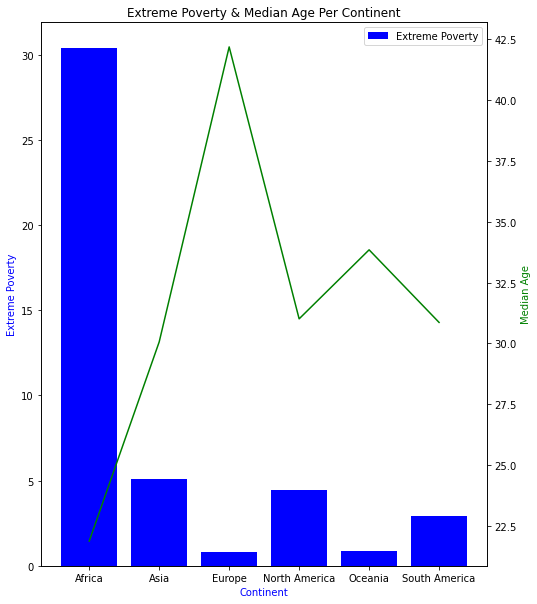

In [33]:
# Median age vs extreme poverty level Per Continent
8
fig, ax = plt.subplots(figsize=(8,10))
ax2 = ax.twinx()
ax.bar(continent_df.index, continent_df["extreme_poverty"], color="blue", label='Extreme Poverty')
ax2.plot(continent_df.index, continent_df["median_age"], color='green', label='median_age')
ax.set_xticklabels(continent_df.index)
ax.legend(loc='best')
ax.set_xlabel("Continent", color="blue")
ax.set_ylabel('Extreme Poverty', color="blue")
ax2.set_ylabel('Median Age', color="green")
# Create a title.
plt.title("Extreme Poverty & Median Age Per Continent")

Text(0.5, 1.0, 'Median Age and Percentage of Population Total Deaths Per Continent')

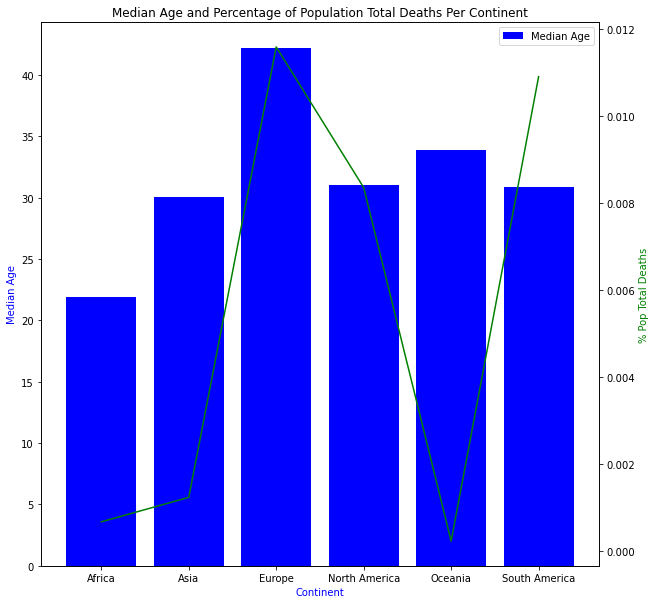

In [31]:
# Median age vs  % pop total deaths

fig, ax = plt.subplots(figsize=(10,10))
ax2 = ax.twinx()
ax.bar(continent_df.index, continent_df["median_age"], color="blue", label='Median Age')
ax2.plot(continent_df.index, continent_df["percentage_of_Pop_Total_Deaths"], color='green', label='% of Pops Total Deaths')
ax.set_xticklabels(continent_df.index)
ax.legend(loc='best')
ax.set_xlabel("Continent", color="blue")
ax.set_ylabel('Median Age', color="blue")
ax2.set_ylabel('% Pop Total Deaths', color="green")
# Create a title.
plt.title("Median Age and Percentage of Population Total Deaths Per Continent")

Text(0.5, 1.0, 'Median Age and Percentage of population Total Cases Per Continent')

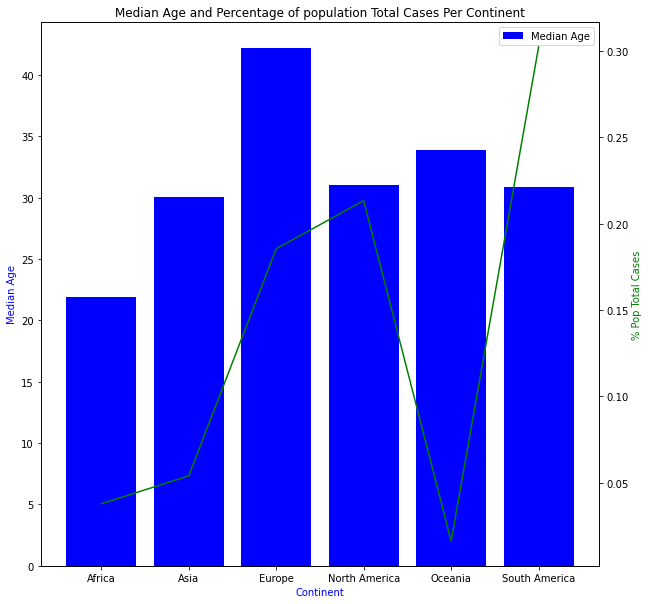

In [32]:
# Median age vs  % pop total deaths

fig, ax = plt.subplots(figsize=(10,10))
ax2 = ax.twinx()
ax.bar(continent_df.index, continent_df["median_age"], color="blue", label='Median Age')
ax2.plot(continent_df.index, continent_df["percentage_of_Pop_Total_Cases"], color='green', label='% of Pops Total Cases')
ax.set_xticklabels(continent_df.index)
ax.legend(loc='best')
ax.set_xlabel("Continent", color="blue")
ax.set_ylabel('Median Age', color="blue")
ax2.set_ylabel('% Pop Total Cases', color="green")
# Create a title.
plt.title("Median Age and Percentage of population Total Cases Per Continent")

# Poor Corellation -To be discarded

Text(0, 0.5, 'Percentage of Population Total Deaths')

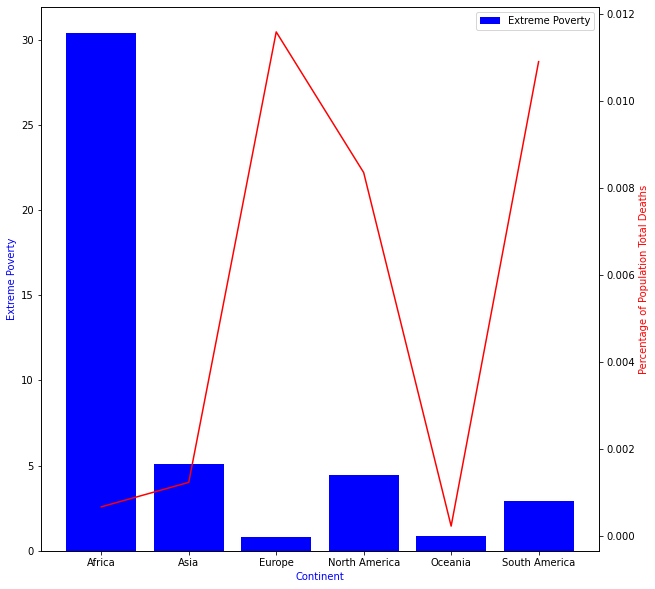

In [16]:
# Extreme poverty level vs % of Population TD Per Continent
fig, ax = plt.subplots(figsize=(10,10))

ax2 = ax.twinx()
ax.bar(continent_df.index, continent_df["extreme_poverty"], color="blue", label='Extreme Poverty')
ax2.plot(continent_df.index, continent_df["percentage_of_Pop_Total_Deaths"], color='red', label='Total Deaths')
ax.set_xticklabels(continent_df.index)
ax.legend(loc='best')
ax.set_xlabel("Continent", color="blue")
ax.set_ylabel('Extreme Poverty', color="blue")
ax2.set_ylabel('Percentage of Population Total Deaths', color="red")

Text(0, 0.5, 'Percentage of Population Total Cases')

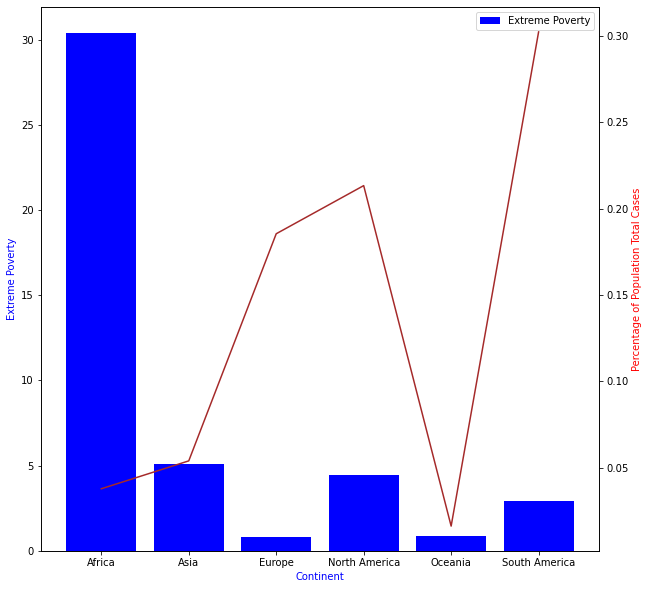

In [18]:
# Extreme poverty level vs percentage of pop TC Per Continent
fig, ax = plt.subplots(figsize=(10,10))
ax2 = ax.twinx()
ax.bar(continent_df.index, continent_df["extreme_poverty"], color="blue", label='Extreme Poverty')
ax2.plot(continent_df.index, continent_df["percentage_of_Pop_Total_Cases"], color='brown', label='Total Cases')
ax.set_xticklabels(continent_df.index)
ax.legend(loc='best')
ax.set_xlabel("Continent", color="blue")
ax.set_ylabel('Extreme Poverty', color="blue")
ax2.set_ylabel('Percentage of Population Total Cases', color="red")